range(2, 21)


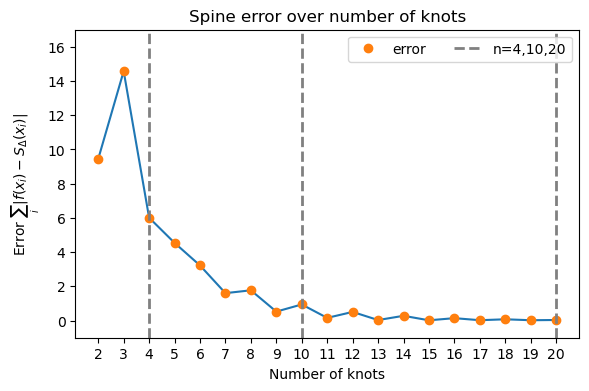

In [47]:
import numpy as np

from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt

def runge(x: float) -> float:
    return 1 / (1 + 25 * x**2)


errors = [] 
steps = range(2,21)
for n in steps:
    #First fit the points
    x = np.linspace(-1,1, n)
    y = runge(x)
    cs = CubicSpline(x, y,bc_type=((2, 0.0), (2, 0.0)))
    #Then calculate the error
    xs = np.linspace(-1, 1, 41)
    ybars= cs(xs)
    error = np.sum(np.abs(ybars - runge(xs)))
    errors.append(error)

print(steps)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(steps, errors)
ax.plot(steps, errors, 'o', label='error')

ax.set_title('Spine error over number of knots')
ax.vlines([4,10,20],-1,17,linestyles='--', color='grey', lw=2, label = 'n=4,10,20')
ax.set_xlabel('Number of knots')
ax.set_ylabel(r'Error $\sum_i|f(x_i) - S_\Delta(x_i)|$')
ax.set_ylim(-1,17)
ax.set_xticks(steps)    
ax.legend(loc='best', ncol=2)

plt.show()